## Certamen 2 - Taller de Inteligencia de Negocios<a href="#Certamen-2---Taller-de-Inteligencia-de-Negocios" class="anchor-link">¶</a>

### Universidad del Desarrollo Primer semestre lectivo año 2020

### Indicaciones<a href="#Indicaciones" class="anchor-link">¶</a>

-   Esta prueba consta de dos partes: Sección teórica que equivale al
    20% y una sección práctica que involucra el 80% de la evaluación.
-   Debe acompañar cada etapa del análisis de datos con comentarios
    escritos y explicativos del por qué hace cada paso.
-   Cualquier indicio de copia será penalizado con la Nota Mínima.
-   Consultar fuentes de información públicas está permitido siempre
    cuando estas estén debidamente referenciadas.
-   El plazo de entrega es el sábado 13 Junio a las 23:59 Horas a tráves
    de Canvas.
    -   Para la entrega del archivo, favor cambiar nombre dejando como
        nuevo nombre "Certamen II - Nombre Apellidos"
    -   Descargar archivo en formato HTML y subir a Canvas (Adjuntar una
        copia del documento en correo directo al profesor:
        joaquin.villagra@udd.cl )

### Datos de los alumnos:<a href="#Datos-de-los-alumnos:" class="anchor-link">¶</a>

-   Nombre: Pía San Martín
-   RUN: 19.152.059-9
-   Nombre: Julián Zúñiga
-   RUN: 19.894.037-2
-   Lenguaje escogido para la solución práctica: Python.

### Parte 1: Construcción y comparación de clasificadores<a href="#Parte-1:-Construcción-y-comparación-de-clasificadores" class="anchor-link">¶</a>

De acuerdo a la tabla 1, descargue su conjunto de datos asignado y
genere un análisis de Inteligencia de Negocios acorde al contexto del
conjunto de datos. Recuerde las etapas vistas en clases:

-   Preprocesamiento de datos (Limpieza, tratamiento de registros nulos
    o faltantes, inconsistencias con tipos de datos, entre otros)
-   Análisis de estadística descriptiva
-   Método a aplicar según el dominio/contexto del problema. En este
    caso, la metodología a aplicar se puede resumir en lo siguiente:
    -   Efectuar un estudio de las variables
    -   Confeccionar un clasificador 1 que se crea conveniente de
        acuerdo a la teoría vista en clases y la investigada
    -   Reacondicionar el clasificador 1, permitiendo generar un mejor
        modelo
    -   Evaluar rendimiento del clasificador 1 (Matriz de confusión,
        exactitud, curva ROC, Recall, entre otras métricas)
    -   Confeccionar un clasificador 2 (utilizando otro método visto en
        clases)
    -   Reacondicionar el clasificador 2, permitiendo generar el mejor
        modelo con ese método
    -   Evaluar el rendimiento del clasificador 2
    -   Comparar ambos modelos, 1 y 2 en relación a sus variables de
        desempeño

Tabla 1: Asignación de conjuntos de datos

<a href="#-Tabla-1:-Asignación-de-conjuntos-de-datos-" class="anchor-link">¶</a>

Nombre Alumn@

Dataset

ACUNA MOHR JAVIER  
ÁLVAREZ ZAMBRANO DIEGO  
BAEZA ROJAS GUSTAVO  
BALLERINI PÉREZ CLAUDIO  
BARRIOS DIAZ VICTOR  
CARVAJAL BARILE CRISTOBAL  
CONTRERAS LETELIER IGNACIO  
COURTIN MORALES SEBASTIÁN  
COVARRUBIAS QUINTANA FELIPE

[Breast Cancer](https://scikit-learn.org/stable/datasets/index.html)

DELGADO SERRA DANIELA  
FAIGUENBAUM GONZALEZ ARIEL  
FARIAS MOLINA JORGE  
GODOY ISSOTTA ADOLFO  
GONZALEZ ROJAS CRISTOBAL  
HARRIET DE SANTIAGO ISABEL  
IBÁÑEZ SAENZ JOSEFA  
LILLO GUTIERREZ CARLA  
MARCHESSI LAJEHANNIERE IGNACIO  
MENA ALAM FRANCISCA

[Digits](https://scikit-learn.org/stable/datasets/index.html)

MUÑOZ PARADA PAVEL  
PAZ RODRÍGUEZ EUGENIO  
PINOCHET FUENZALIDA  
PRADO GAVILAN BENJAMIN  
ROJAS LAZO RICARDO  
RUBILAR LEIVA JOSEFINA  
SAN MARTÍN CORREA PÍA  
SCHURCH FERNANDEZ JOAQUIN  
SIERRA FUENTES DAVID  
SILVA RETAMAL JAVIER

[Breast Cancer o
Digits](https://scikit-learn.org/stable/datasets/index.html)

SILVA ROBLES VICENTE  
VALDEBENITO CÁRDENAS DIEGO  
VALDÉS SAAVEDRA FÉLIX  
VARGAS POBLETE FELIPE  
VÁSQUEZ APOLONIO JOSÉ  
VIDAL VERGARA IGNACIO  
VILLABLANCA TRUCCO SEBASTIÁN  
ZÚÑIGA ERRÁZURIZ JULIÁN

[Wine](https://scikit-learn.org/stable/datasets/index.html)

*\*\*\* Recordar que el certamen puede ser abordado en parejas. En el
caso que sea así, tienen la posibilidad de escoger entre los datasets
que hayan sido asignado a uno u otro integrante del equipo.*

In \[4\]:

    #Se importan las librerias a utilizar
    import pandas as pd
    import seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    from sklearn.ensemble import ExtraTreesClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.datasets import load_wine
    from sklearn.svm import SVC
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import roc_curve, auc
    from sklearn import datasets
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.svm import LinearSVC
    from sklearn.preprocessing import label_binarize
    import matplotlib.pyplot as plt

In \[5\]:

    #Se lee toda la información sobre la base de datos a analizar (variables, número de columnas, número de filas, datos nulos, 
    #las cantidades reales de cada clase, entre otros) y se descarga la base de datos a través del link correspondiente. 
    wine_data = load_wine()
    print(wine_data.DESCR)

    .. _wine_dataset:

    Wine recognition dataset
    ------------------------

    **Data Set Characteristics:**

        :Number of Instances: 178 (50 in each of three classes)
        :Number of Attributes: 13 numeric, predictive attributes and the class
        :Attribute Information:
            - Alcohol
            - Malic acid
            - Ash
            - Alcalinity of ash  
            - Magnesium
            - Total phenols
            - Flavanoids
            - Nonflavanoid phenols
            - Proanthocyanins
            - Color intensity
            - Hue
            - OD280/OD315 of diluted wines
            - Proline

        - class:
                - class_0
                - class_1
                - class_2
            
        :Summary Statistics:
        
        ============================= ==== ===== ======= =====
                                       Min   Max   Mean     SD
        ============================= ==== ===== ======= =====
        Alcohol:                      11.0  14.8    13.0   0.8
        Malic Acid:                   0.74  5.80    2.34  1.12
        Ash:                          1.36  3.23    2.36  0.27
        Alcalinity of Ash:            10.6  30.0    19.5   3.3
        Magnesium:                    70.0 162.0    99.7  14.3
        Total Phenols:                0.98  3.88    2.29  0.63
        Flavanoids:                   0.34  5.08    2.03  1.00
        Nonflavanoid Phenols:         0.13  0.66    0.36  0.12
        Proanthocyanins:              0.41  3.58    1.59  0.57
        Colour Intensity:              1.3  13.0     5.1   2.3
        Hue:                          0.48  1.71    0.96  0.23
        OD280/OD315 of diluted wines: 1.27  4.00    2.61  0.71
        Proline:                       278  1680     746   315
        ============================= ==== ===== ======= =====

        :Missing Attribute Values: None
        :Class Distribution: class_0 (59), class_1 (71), class_2 (48)
        :Creator: R.A. Fisher
        :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
        :Date: July, 1988

    This is a copy of UCI ML Wine recognition datasets.
    https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

    The data is the results of a chemical analysis of wines grown in the same
    region in Italy by three different cultivators. There are thirteen different
    measurements taken for different constituents found in the three types of
    wine.

    Original Owners: 

    Forina, M. et al, PARVUS - 
    An Extendible Package for Data Exploration, Classification and Correlation. 
    Institute of Pharmaceutical and Food Analysis and Technologies,
    Via Brigata Salerno, 16147 Genoa, Italy.

    Citation:

    Lichman, M. (2013). UCI Machine Learning Repository
    [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California,
    School of Information and Computer Science. 

    .. topic:: References

      (1) S. Aeberhard, D. Coomans and O. de Vel, 
      Comparison of Classifiers in High Dimensional Settings, 
      Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of  
      Mathematics and Statistics, James Cook University of North Queensland. 
      (Also submitted to Technometrics). 

      The data was used with many others for comparing various 
      classifiers. The classes are separable, though only RDA 
      has achieved 100% correct classification. 
      (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data)) 
      (All results using the leave-one-out technique) 

      (2) S. Aeberhard, D. Coomans and O. de Vel, 
      "THE CLASSIFICATION PERFORMANCE OF RDA" 
      Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of 
      Mathematics and Statistics, James Cook University of North Queensland. 
      (Also submitted to Journal of Chemometrics).

In \[7\]:

    #Se genera el dataFrame con los datos con la libreria Pandas 
    vino = pd.read_csv("wine.data", names = ["Class", "Alcohol","Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                       "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines",
                       "Proline"])

In \[8\]:

    #Se revisa si el conjunto de datos esta correctamente distribuido.
    vino.head()

Out\[8\]:

|     | Class | Alcohol | Malic acid | Ash  | Alcalinity of ash | Magnesium | Total phenols | Flavanoids | Nonflavanoid phenols | Proanthocyanins | Color intensity | Hue  | OD280/OD315 of diluted wines | Proline |
|-----|-------|---------|------------|------|-------------------|-----------|---------------|------------|----------------------|-----------------|-----------------|------|------------------------------|---------|
| 0   | 1     | 14.23   | 1.71       | 2.43 | 15.6              | 127       | 2.80          | 3.06       | 0.28                 | 2.29            | 5.64            | 1.04 | 3.92                         | 1065    |
| 1   | 1     | 13.20   | 1.78       | 2.14 | 11.2              | 100       | 2.65          | 2.76       | 0.26                 | 1.28            | 4.38            | 1.05 | 3.40                         | 1050    |
| 2   | 1     | 13.16   | 2.36       | 2.67 | 18.6              | 101       | 2.80          | 3.24       | 0.30                 | 2.81            | 5.68            | 1.03 | 3.17                         | 1185    |
| 3   | 1     | 14.37   | 1.95       | 2.50 | 16.8              | 113       | 3.85          | 3.49       | 0.24                 | 2.18            | 7.80            | 0.86 | 3.45                         | 1480    |
| 4   | 1     | 13.24   | 2.59       | 2.87 | 21.0              | 118       | 2.80          | 2.69       | 0.39                 | 1.82            | 4.32            | 1.04 | 2.93                         | 735     |

In \[9\]:

    #Se analiza el tipo de cada una de las variables
    vino.dtypes

Out\[9\]:

    Class                             int64
    Alcohol                         float64
    Malic acid                      float64
    Ash                             float64
    Alcalinity of ash               float64
    Magnesium                         int64
    Total phenols                   float64
    Flavanoids                      float64
    Nonflavanoid phenols            float64
    Proanthocyanins                 float64
    Color intensity                 float64
    Hue                             float64
    OD280/OD315 of diluted wines    float64
    Proline                           int64
    dtype: object

In \[10\]:

    #Se hace una breve descripción de la variable "Class" respecto al alcohol 
    # Se evidencia que de tipo 1 -> 59, tipo 2 -> 71, y tipo 3 -> 48, y el promedio de estos 13,74, 12,27 y 13,15 respectivamente. 
    vino.groupby("Class").Alcohol.describe()

Out\[10\]:

|       | count | mean      | std      | min   | 25%    | 50%    | 75%    | max   |
|-------|-------|-----------|----------|-------|--------|--------|--------|-------|
| Class |       |           |          |       |        |        |        |       |
| 1     | 59.0  | 13.744746 | 0.462125 | 12.85 | 13.400 | 13.750 | 14.100 | 14.83 |
| 2     | 71.0  | 12.278732 | 0.537964 | 11.03 | 11.915 | 12.290 | 12.515 | 13.86 |
| 3     | 48.0  | 13.153750 | 0.530241 | 12.20 | 12.805 | 13.165 | 13.505 | 14.34 |

In \[11\]:

    #Se realiza una correlación respecto a todas las variables presentes en el modelo. 
    #En cuanto a estas se percibe que la variable "Class" tiene una mayor correlacion con las demás variables analizadas. 
    tabla_correlacion = vino.corr().round(1)
    tabla_correlacion
    sns.heatmap(data=tabla_correlacion, annot=True)

Out\[11\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x2d6d9c81788>

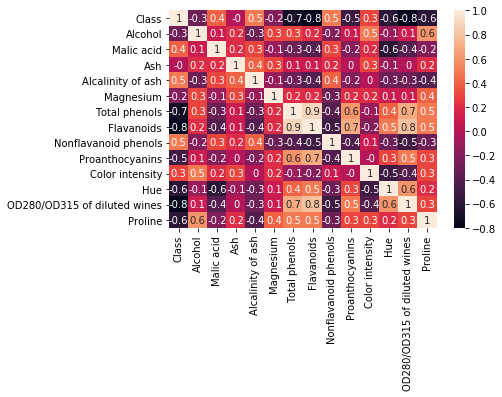

In \[18\]:

    #Se realiza un gráfico separando por la variable "Class"
    #En el cual se expone como se distribuyen las variables de forma gráfica

    vino_edit = vino[["Alcohol", "Flavanoids", "Color intensity", "OD280/OD315 of diluted wines", "Proline","Class"]]
    sns.pairplot(vino_edit, hue= "Class")

Out\[18\]:

    <seaborn.axisgrid.PairGrid at 0x2d6e30f9988>

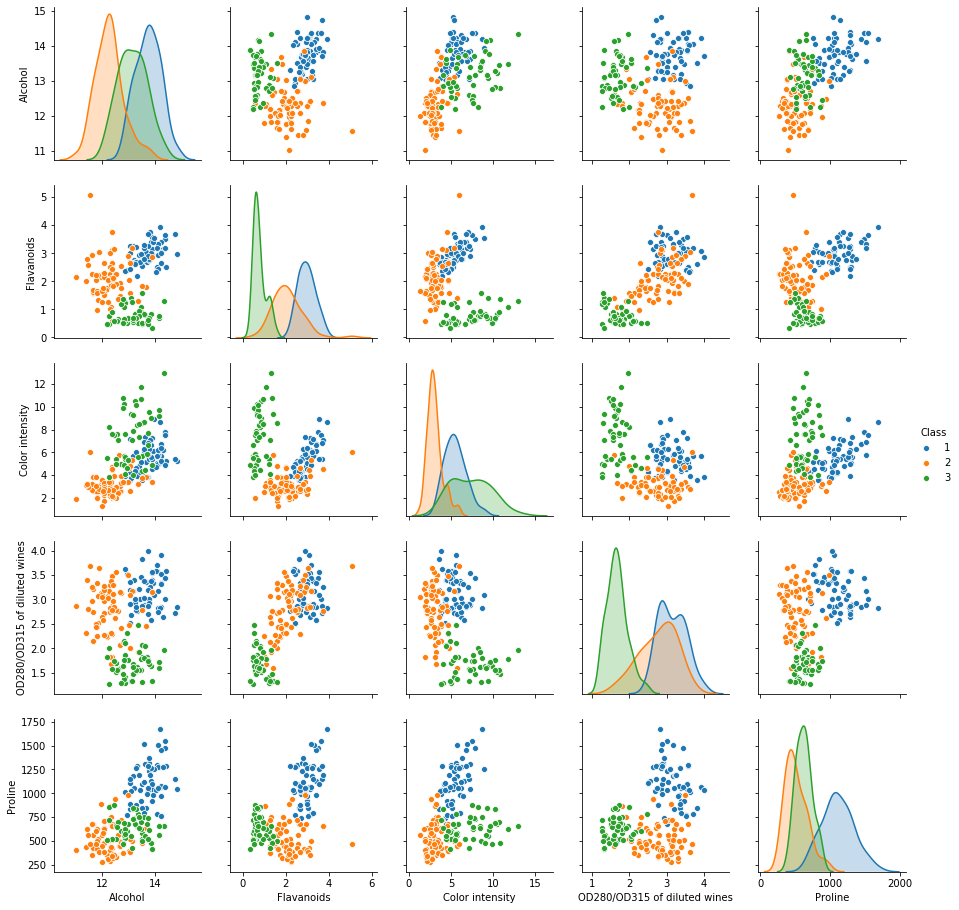

In \[35\]:

    #Elegir datos mas representativos del modelo, para luego ser utilizados en el Random Forest. 
    #A continuación se definen las variables x e y (clasificador).
    X = vino[["Alcohol", "Flavanoids", "Color intensity", "OD280/OD315 of diluted wines", "Proline"]]
    y = vino["Class"]

In \[40\]:

    # Se separa el conjunto de datos en datos que se van a entrenar y datos que van a ser testeados. 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

    #Iniciamos el algoritmo Random Forest con 100 árboles. 
    classifier = RandomForestClassifier(n_estimators=100)

    #Construimos el modelo sobre los datos de entrenamiento
    classifier = classifier.fit(X_train,y_train)

    #Predecimos para los valores del grupo Test
    predicciones = classifier.predict(X_test)

In \[37\]:

    #Se crea la matriz de confusión. En la cual se predice en base a los 54 datos totales que pertenecen al testeo, de esta misma muestra se comprueba que 
    #se predice correctamente los 16 vinos de la clase 1, de la clase 2 se predice bien 23 y un caso erróneo que es considerado como clase 3, 
    #y por último para la clase 3 se consideran correctos 14 vinos. 
    print (metrics.confusion_matrix(y_test,predicciones))

    [[16  0  0]
     [ 0 23  1]
     [ 0  0 14]]

In \[38\]:

    #En este punto se aprecia que la precisión es de un 98,14% 
    metrics.accuracy_score(y_test, predicciones)

Out\[38\]:

    0.9814814814814815

In \[39\]:

    #En este paso se evidencia la importancia de cada variable analizada.  
    #La funcion ExtraTreesClassifier es utilizada para minimizar el sobreaprendizaje de los datos y el sobreajuste
    modelo = ExtraTreesClassifier()
    modelo.fit(X_train,y_train)
    print(modelo.feature_importances_)

    [0.18510651 0.25555425 0.17385737 0.19413555 0.19134633]

In \[41\]:

    #Se calcula la correlacion de las variables mas representativas del modelo , y se entrega de forma visual cuales son las varibles con mas correlación. 
    #Cuando los atributos están correlacionados,
    #la medida de importancia de atributos puede estar sesgada por datos de instancias no realistas.

    vino_edit = vino[["Alcohol", "Flavanoids", "Color intensity", "OD280/OD315 of diluted wines", "Proline","Class"]]
    tabla_correlacion = vino_edit.corr().round(1)
    tabla_correlacion
    sns.heatmap(data=tabla_correlacion, annot=True)

Out\[41\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x2d6e6c993c8>

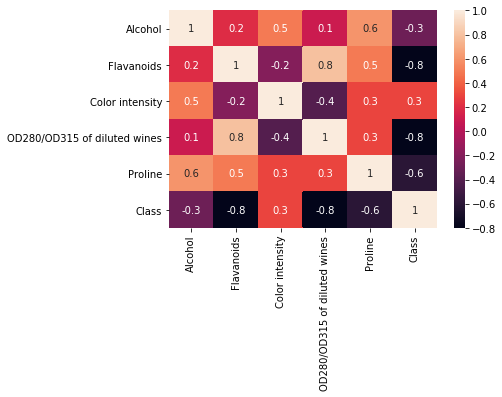

In \[58\]:

    X = vino[["Alcohol", "Flavanoids", "Color intensity", "OD280/OD315 of diluted wines", "Proline"]]
    y = vino["Class"]
    #Se transforman en binario el clasificador 
    y = label_binarize(y, classes=[1,2,3])
    #Se menciona el número de clases 
    n_classes = 3
    #Se realiza la separación en conjunto de datos de testeo y conjunto de datos a entrenar. 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    #Clasificador de tipo SVM Lineal 
    clf = OneVsRestClassifier(LinearSVC(random_state=0))
    y_score = clf.fit(X_train, y_train).decision_function(X_test)

    #Calcula la curva ROC y el área ROC para cada clase
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #Trazado de una curva ROC para una clase específica
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Tasa de Falso Positivo')
        plt.ylabel('Tasa de Verdadero Positivo')
        plt.title('Receiver operating characteristic(ROC)')
        plt.legend(loc="lower right")
        plt.show()

    C:\Users\julia\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
      "the number of iterations.", ConvergenceWarning)
    C:\Users\julia\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
      "the number of iterations.", ConvergenceWarning)
    C:\Users\julia\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
      "the number of iterations.", ConvergenceWarning)

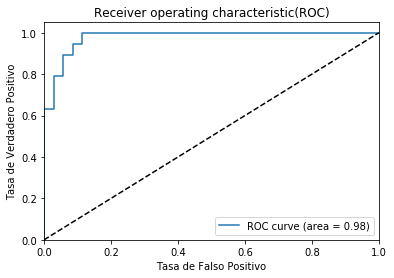

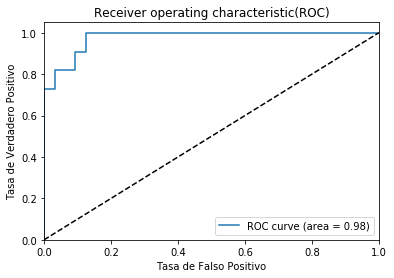

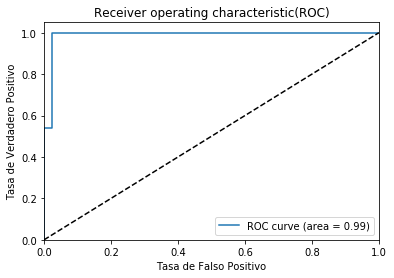

In \[116\]:

    X = vino[["Alcohol","Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                       "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines",
                       "Proline"]]
    y = vino["Class"]
    # Se realiza la separación para un conjunto de datos de testeo y entrenamiento 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    #Se aplica el "Kernel"
    svclassifier = SVC(kernel='linear')
    #Se realiza el entrenamiento 
    svclassifier.fit(X_train, y_train)
    #Se inicia la predicción en base al entrenamiento 
    y_pred = svclassifier.predict(X_test)
    #Se crea la matriz de confusión del SVM respectiva.
    print(confusion_matrix(y_test,y_pred))
    #Se hace un reporte respecto al modelo SVM. 
    print(classification_report(y_test,y_pred))
    #En base a un total de 54 datos, se observa que la clase 1 los 18 se predijeron correctamente, en cambio la clase dos tuvo 20 aciertos y 3 fallas. De la clase 3
    5#Se puede concluir que tuvo 100% acierto 

    [[18  0  0]
     [ 2 20  1]
     [ 0  0 13]]
                  precision    recall  f1-score   support

               1       0.90      1.00      0.95        18
               2       1.00      0.87      0.93        23
               3       0.93      1.00      0.96        13

        accuracy                           0.94        54
       macro avg       0.94      0.96      0.95        54
    weighted avg       0.95      0.94      0.94        54

### Comparar ambos modelos, 1 y 2 en relación a sus variables de desempeño:<a href="#Comparar-ambos-modelos,-1-y-2-en-relación-a-sus-variables-de-desempeño:" class="anchor-link">¶</a>

-   Se puede concluir en cuanto a ambos modelos, que el primero que se
    analizó (Random Forest) entregó una precisión de un 98,14% mientras
    que en el segundo modelo (SVM) fue de un 94%. En base a la matriz de
    confusión de ambos modelos se puede concluir que el modelo uno tuvo
    un mejor desempeño al predecir los 54 datos en comparacion al modelo
    dos, ya que este último registro más errores al clasificar las
    variables y como consecuencia menos precisión en la muestra. Por
    otra parte, se evidencia que ambos modelos tuvieron mas dificultad
    en clasificar la clase 2, por lo que se puede argumentar que esta
    presenta mayores problemas para su correcta predicción. Como
    conclusión se puede decir que el clasificador con mejores resultados
    para este conjunto de datos fue el modelo 1, "Random Forest".

# Parte 2: Sección de preguntas teóricas<a href="#Parte-2:-Sección-de-preguntas-teóricas" class="anchor-link">¶</a>

###### 1) Respecto a los algortimos de clasificación vistos en clases, ¿Cuál cree que es el mejor? ¿Por qué? (PD: Para poseer todo el puntaje en esta pregunta debe realizar una descripción de cada uno de los métodos vistos y de su aplicación, comparando ventajas y desventajas. Finalmente, mediante un criterio definido por Ud debe elegir uno que sobresalga en base a dicho criterio).<a href="#1)-Respecto-a-los-algortimos-de-clasificación-vistos-en-clases,-¿Cuál-cree-que-es-el-mejor?-¿Por-qué?-(PD:-Para-poseer-todo-el-puntaje-en-esta-pregunta-debe-realizar-una-descripción-de-cada-uno-de-los-métodos-vistos-y-de-su-aplicación,-comparando-ventajas-y-desventajas.-Finalmente,-mediante-un-criterio-definido-por-Ud-debe-elegir-uno-que-sobresalga-en-base-a-dicho-criterio)." class="anchor-link">¶</a>

Métodos de clasificación:

-   Regresion logistica: mide la relación entre una variable dependiente
    (lo que se busca clasificar) y una o más variables independientes
    para determinar la probabilidad de la variable dependiente en el
    modelo. Este último entrega una función que representa de mejor
    forma todo un conjunto de datos.
-   Ventajas: No es necesario tener grandes recursos computacionales, es
    un método simple y de facil interpretación.
-   Desventajas: No puede resolver directamente problemas no lineales de
    manera simple, se debe modificar la entrada para poder trabajar con
    ese tipo de datos. Por otra parte, al tener varios datos de tipo
    "outlier" puede llevar a una interpretación errónea del modelo.

<!-- -->

-   Random Forest: este clasificador genera un conjunto de diversos
    árboles de decisión. Luego al combinar sus resultados, eliminar sus
    errores se genera una predicción del modelo.
-   Ventajas: funciona con datasets muy grandes, puede tener muchas
    variables sin realizar ajustes, detecta la relación entre sus
    variables y determina su importancia.
-   Desventajas: no funciona con datasets pequeños, es dificil
    interpretar todos los árboles generados. Por otra parte, si los
    datos están correlacionados y tienen similar relevancia entre ellos,
    los grupos más pequeños se favorecen sobre los más grandes.

<!-- -->

-   SVM: Separa cada clase por planos, luego construye un modelo con los
    datos para poder predecir a que plano(clase) pertenece cada dato.
-   Ventaja: Combina el uso de la computación con la argumentación
    teórica, es eficaz en espacios de grandes dimensiones
-   Desventaja: Debido a su alto tiempo al procesar datos, estos son
    inadecuados cuando se trata de conjuntos de datos muy grandes.

<!-- -->

-   Clasificancion bayesiana (bayer ingenuo): Este clasificador asume
    que las caracteristicas de una clase son independientes entre ellas.
    De esta forma las calcula la probabilidad que sea de cierta clase
    analizando independientemente cada una de las características.
-   Ventaja: Fácil interpretación de datos continuos, es rápido de
    entrenar y clasificar.
-   Desventaja: Asume que las caracteristicas de las clases son
    independientes.

<!-- -->

-   En conclusión como se expuso en los incisos anteriores, podemos
    decir que el clasificador más eficiente es Random Forest, ya que se
    puede adaptar para diversos problemas, es bastante preciso ya que
    simula diversos arboles de decisión, luego combina todos los
    resultados y genera la opcion óptima.

#### 2) Cuando hablamos del método de árboles aleatorios o Random Forest en Inglés, ¿Por qué se define este método como un método ensamblado? ¿Que diferencia existe versus un árbol de clasificación simple?<a href="#2)-Cuando-hablamos-del-método-de-árboles-aleatorios-o-Random-Forest-en-Inglés,-¿Por-qué-se-define-este-método-como-un-método-ensamblado?-¿Que-diferencia-existe-versus-un-árbol-de-clasificación-simple?" class="anchor-link">¶</a>

-   "Random Forest" se define como uno método ensamblado por que crea
    aleatoriamente una gran cantidad de áboles de decisión muy poco
    profundos y los ensambla. Gracias a esto, el random forest puede
    generar diversos clasificadores (árboles de decisión) con cierta
    capacidad de predicción para luego reunir la información de cada
    uno, y de esta forma unificar el aprendizaje. Por otra parte, el
    método "árbol de clasificación simple" genera solo un árbol pero a
    diferencia del método anterior este es más profundo.

#### 3) En lo que respecta al método de clasificación Bayesiana y su aplicación en contextos médicos. ¿Por qué es conveniente o natural su uso en dicho contexto y no en otro? ¿Que imposibilita usarlo en otros escenarios de indole empresarial/comercial?<a href="#3)-En-lo-que-respecta-al-método-de-clasificación-Bayesiana-y-su-aplicación-en-contextos-médicos.-¿Por-qué-es-conveniente-o-natural-su-uso-en-dicho-contexto-y-no-en-otro?-¿Que-imposibilita-usarlo-en-otros-escenarios-de-indole-empresarial/comercial?" class="anchor-link">¶</a>

-   Como se expuso en el inciso 1, se puede evidenciar que este método
    de clasificación es de suma importancia para contribuir al
    diagnostico médico rechazando o confirmando test de hipotesis para
    luego poder interpretar estas mismas en los diagnosticos de los
    pacientes. El resultado de estas clasificaciones puede predecir si
    un paciente es catalogado como sano o enfermo por lo que en base a
    esto se puede contribuir a la evolucion del paciente, como prevenir,
    orientar su tratamiento entre otros. Por otra parte, en la indole
    empresarial/comercial deseo saber una estimación en el tiempo que
    pueda predecir el comportamiento de mis variables, no comprobar una
    H0/H1 como es en el caso médico.

#### 4) Tomando como base la siguiente matriz de confusión, comente.<a href="#4)-Tomando-como-base-la-siguiente-matriz-de-confusión,-comente." class="anchor-link">¶</a>

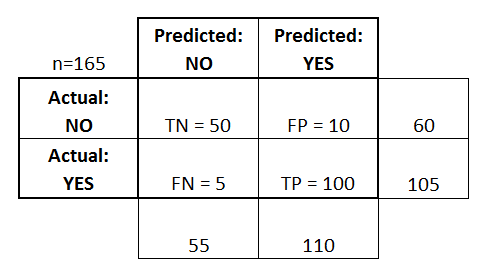

En la imagen expuesta en el inciso 4, la muestra cuenta con un total de
165

-   A continuación se procedió a calcular las siguientes métricas;
    -   Precision: 90,9% , Se evidencia que la calidad del total de
        todos los datos positivos junto con los datos "false positive"
        es de un 90,9%
    -   Recall: 95,2% , En base a este resultado se puede asumir que el
        modelo es capaz de predecir el 95,2% de los verdaderos casos
        positivos.
    -   Specificity: 83,3% , Esta variable métrica predice en cuanto a
        todas las variables negativas cuales realmente son de caracter
        "true negative" y se evidencia que la especificidad es de un
        83,3%
    -   Como se puede evidenciar en cuanto a estas metricas el "Recall"
        fue el parametro más alto dentro de las demás lo que indica que
        este modelo es mas propenso a tener falsos positivos que falsos
        negativos. Es por esto, que se puede concluir que el modelo es
        apto para ser desarrollado en el ámbito médico, ya que la
        probabilidad de tener un "error de tipo ll" es menor a tener uno
        de "tipo l" , por ejemplo, es mejor predecir en base al modelo
        que un paciente tiene una enfermedad asociada a que el paciente
        no presenta la enfermedad, siendo que este efectivamente padece
        la enfermedad.

##### 5) Con referencia en la imagen a continuación, favor defina las métricas Recall, Precision, Espeficidad y Sensibilidad utilizando sus palabras (Puede utilizar información de otras fuentes para complementar, referenciado el sitio/libro consultado)<a href="#5)-Con-referencia-en-la-imagen-a-continuación,-favor-defina-las-métricas-Recall,-Precision,-Espeficidad-y-Sensibilidad-utilizando-sus-palabras-(Puede-utilizar-información-de-otras-fuentes-para-complementar,-referenciado-el-sitio/libro-consultado)" class="anchor-link">¶</a>

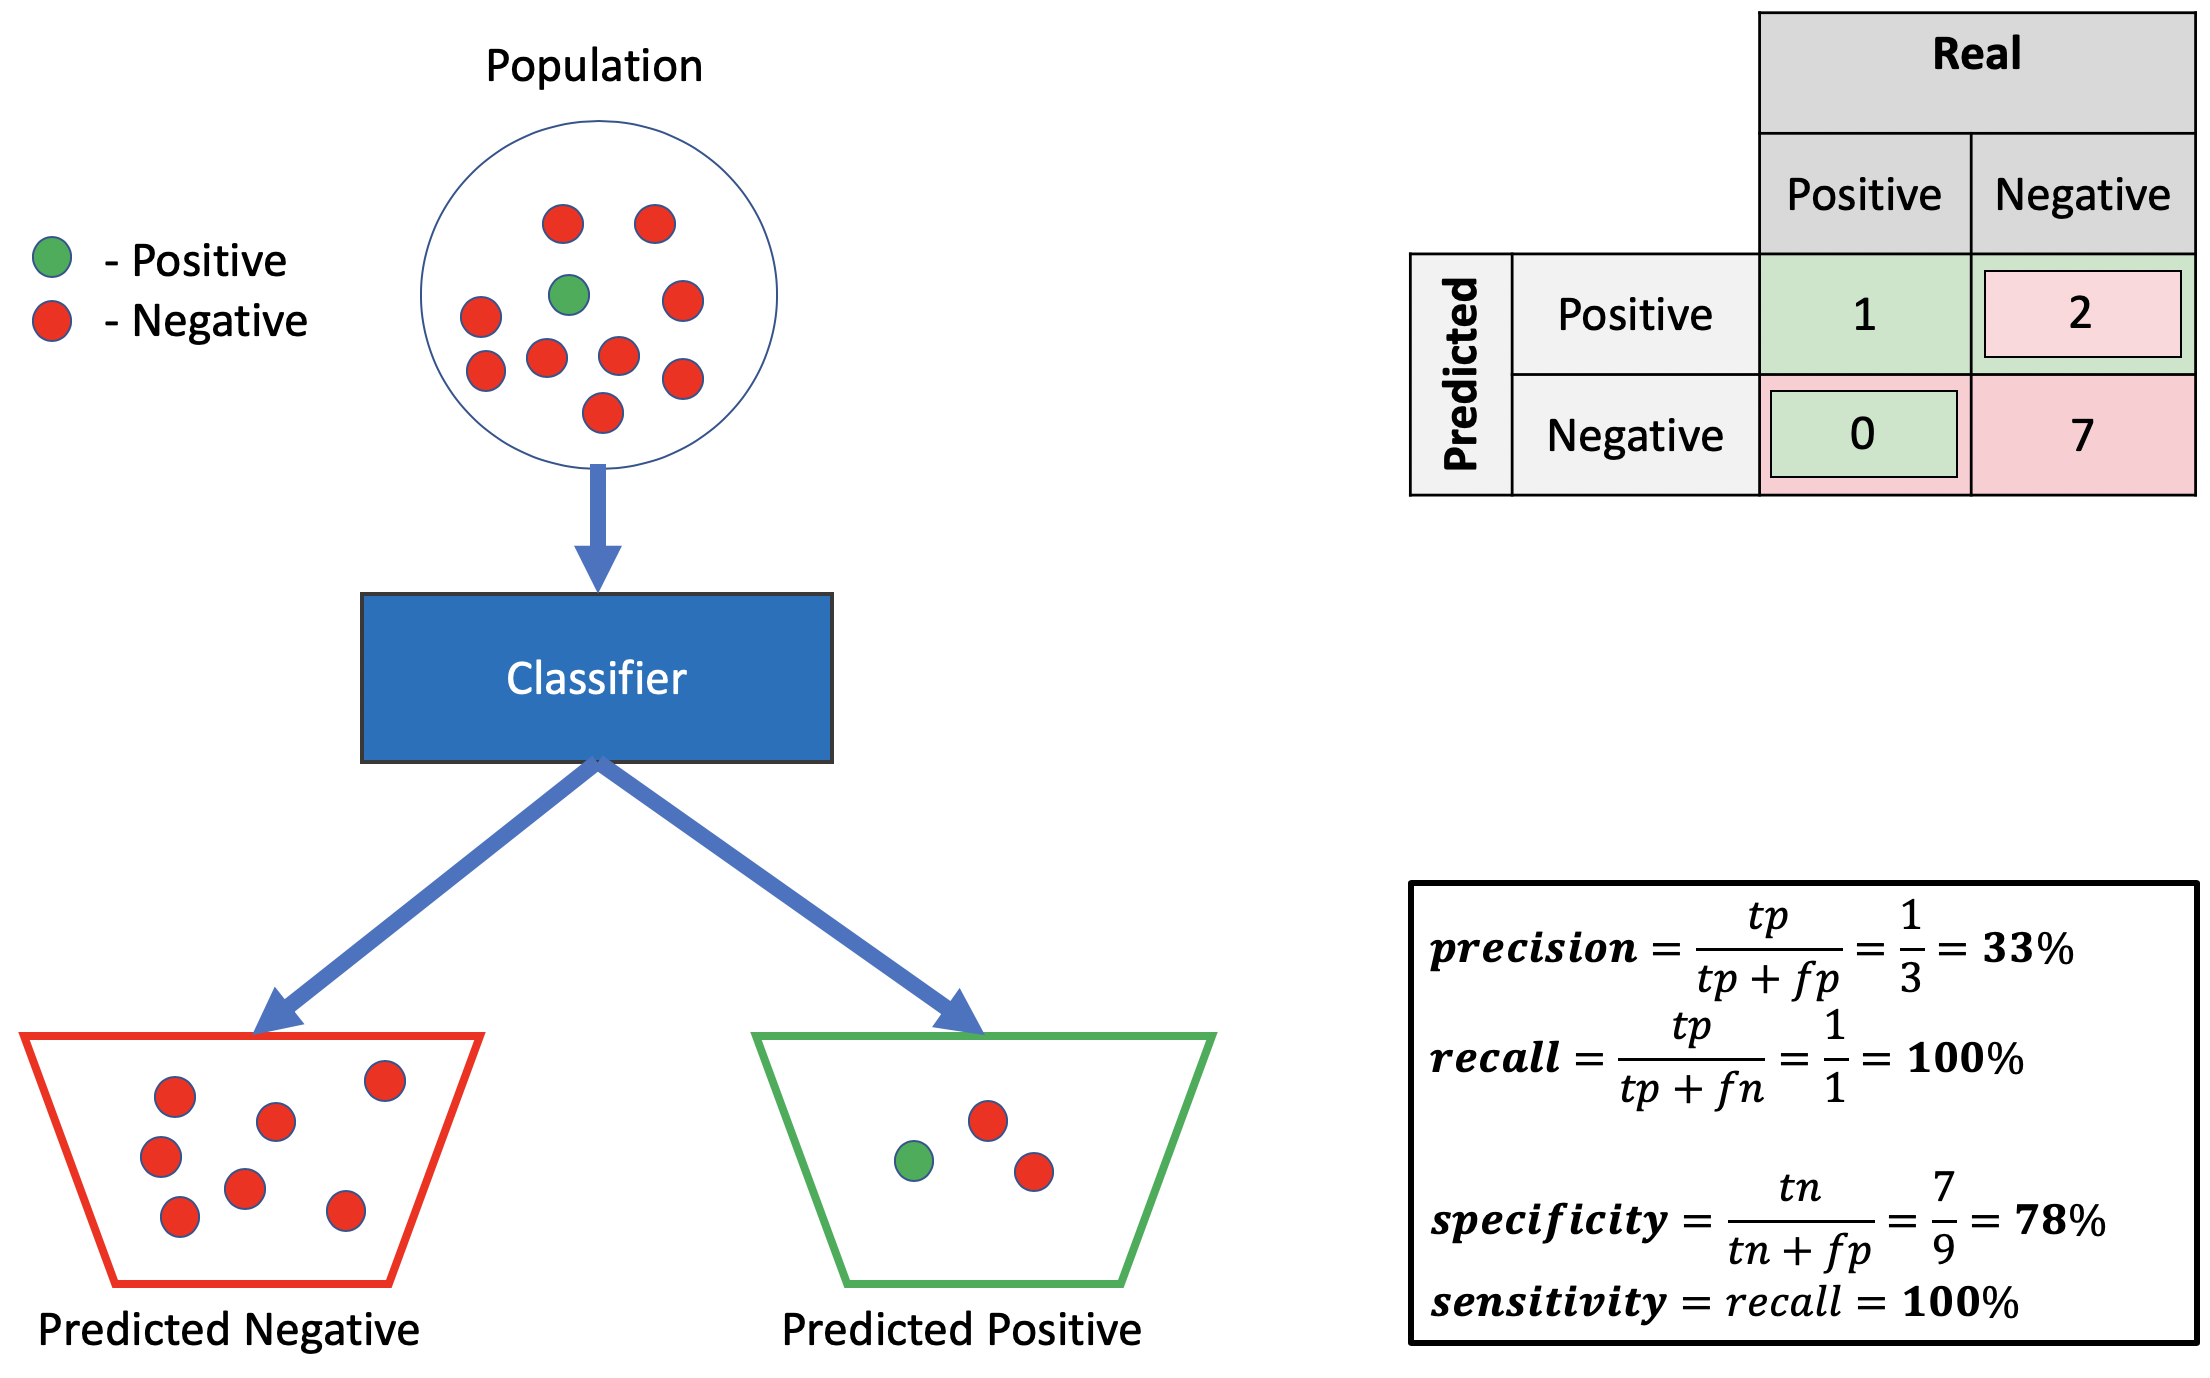

-   Recall: Se conoce como la tasa de verdaderos positivos, en este
    ejemplo es capaz de predecir el 100% de los casos positivos es
    decir, la proporcion de casos positivos expuestos en el modelo es
    completamente identificado por el clasificador. Es importante que
    este parametro sea lo más cercano a 100% para no cometer error de
    tipo ll, ya que este es el más perjudicial para la base de datos a
    estudiar.
-   Precision: capacidad que tiene el clasificador de realmente predecir
    los "true positive" respecto a todos los que dan positivo, es decir
    la calidad de los datos positivos que predice el clasificador, en
    este ejemplo se percibe claramente que la precisión es un 33% con
    respecto del total de casos positivos.
-   Especificidad: capacidad que tiene el clasificador de realmente
    predecir los "true negative" respecto a todos los que dan positivo,
    es decir la calidad de los datos negativos que predice el
    clasificador, en este ejemplo se percibe claramente que la precisión
    es un 78%
-   Sensibilidad: La sensibilidad indica la relevancia de los resultados
    brindados por el clasificador, en este ejemplo dio un 100% lo que
    indica que el modelo tiene una alta sensibilidad y predice el 100%
    de casos positivos.

#### 6) De acuerdo al método de SVM, explique la importancia del Kernel en el método. Además, describa el concepto de la función de costos del mismo y describa para que sirve a la hora de evaluar la performance del o los modelos generados.<a href="#6)-De-acuerdo-al-método-de-SVM,-explique-la-importancia-del-Kernel-en-el-método.-Además,-describa-el-concepto-de-la-función-de-costos-del-mismo-y-describa-para-que-sirve-a-la-hora-de-evaluar-la-performance-del-o-los-modelos-generados." class="anchor-link">¶</a>

-   El "Kernel" en el método "Máquinas de vectores de soporte" es
    imprescindible para los sistemas computacionales ya que esto
    presentan una limitación para realizar el modelo es aqui donde el
    kernel es de gran aporte para el SVM entregando una solución al
    problema proyectando la información a un mayor espacio, con
    múltiples dimensiones, de esta forma se aumenta la capacidad de los
    sistemas computancionales.

-   En base a la funcion de costos se puede mencionar que mediante a
    cada iteración se realiza el costo de cada iteración lo cual
    finalmente se genera un promedio de todas los costos de las
    iteraciones. El costo representa los datos mal calificados y se
    utiliza para evaluar la calidad de la solución del SVM. Es
    recomendable realizar un gran número de iteraciones con el fin de
    encontrar un conjunto de parametros óptimos.

##### Bibliografia<a href="#Bibliografia" class="anchor-link">¶</a>

-   <https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200>
-   <https://bookdown.org/content/2031/ensambladores-random-forest-parte-i.html#random-forest>
-   <https://www.geeksforgeeks.org/confusion-matrix-machine-learning/>
-   <https://stackoverflow.com/questions/45332410/sklearn-roc-for-multiclass-classification>
-   <https://relopezbriega.github.io/blog/2015/10/10/machine-learning-con-python/>
-   <https://www.juanbarrios.com/matriz-de-confusion-y-sus-metricas/>